<a href="https://colab.research.google.com/github/rajeevrpandey/California-Housing-Prices-Prediction/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
#Importing the dataset
import pandas as pd

def load_housing_data():
    url = 'https://raw.githubusercontent.com/rajeevrpandey/California-Housing-Prices-Prediction/79180ab711eac087614457ae03a2bd6d51ebadb7/housing.csv'
    return pd.read_csv(url)

housing = load_housing_data()


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Watching the data types of features and null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#Analysing the string type feature
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

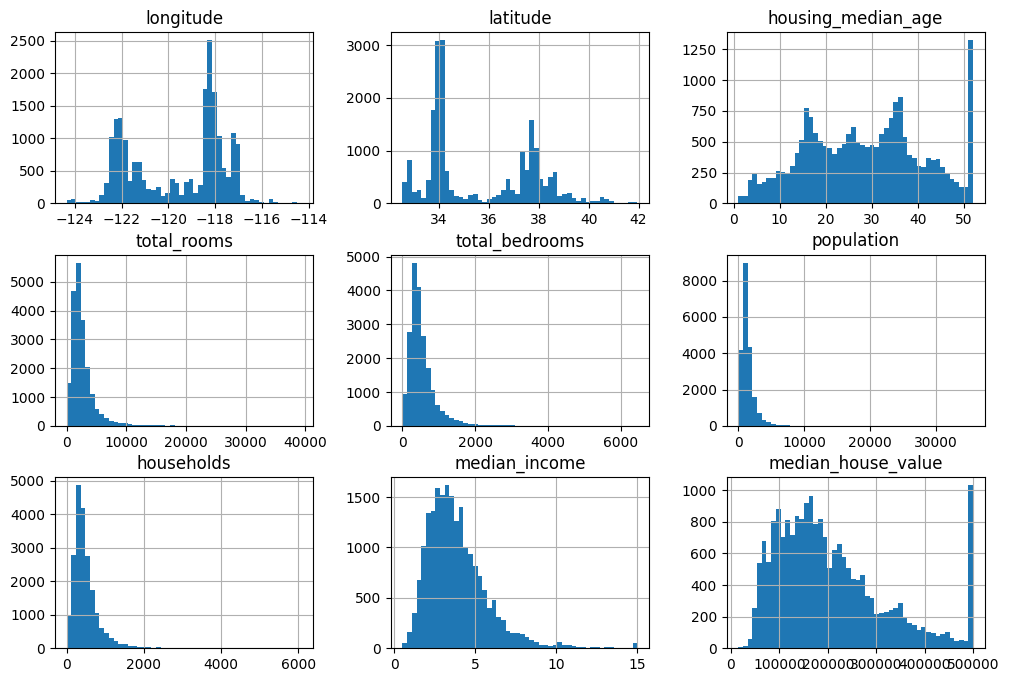

In [8]:
#Histograms
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (12,8))

In [9]:
#Putting aside the test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing = train_set.copy()

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

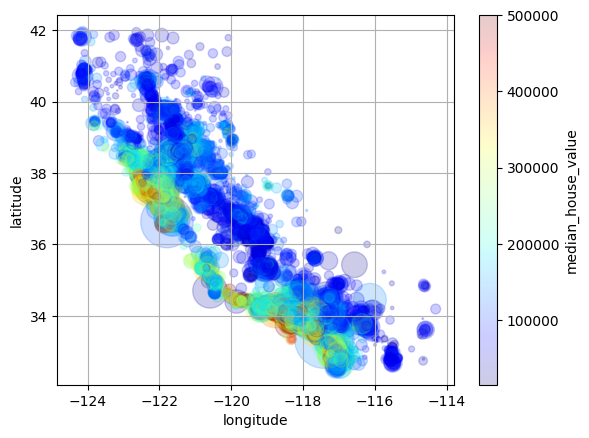

In [11]:
#Since dataset has geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"]*0.05, c="median_house_value", cmap="jet", grid=True)

In [12]:
corr_matrix = housing.corr()

<ipython-input-12-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [13]:
corr_matrix["median_house_value"].sort_values()

latitude             -0.146324
longitude            -0.043603
population           -0.025820
total_bedrooms        0.049993
households            0.065798
housing_median_age    0.104714
total_rooms           0.134060
median_income         0.687013
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='media

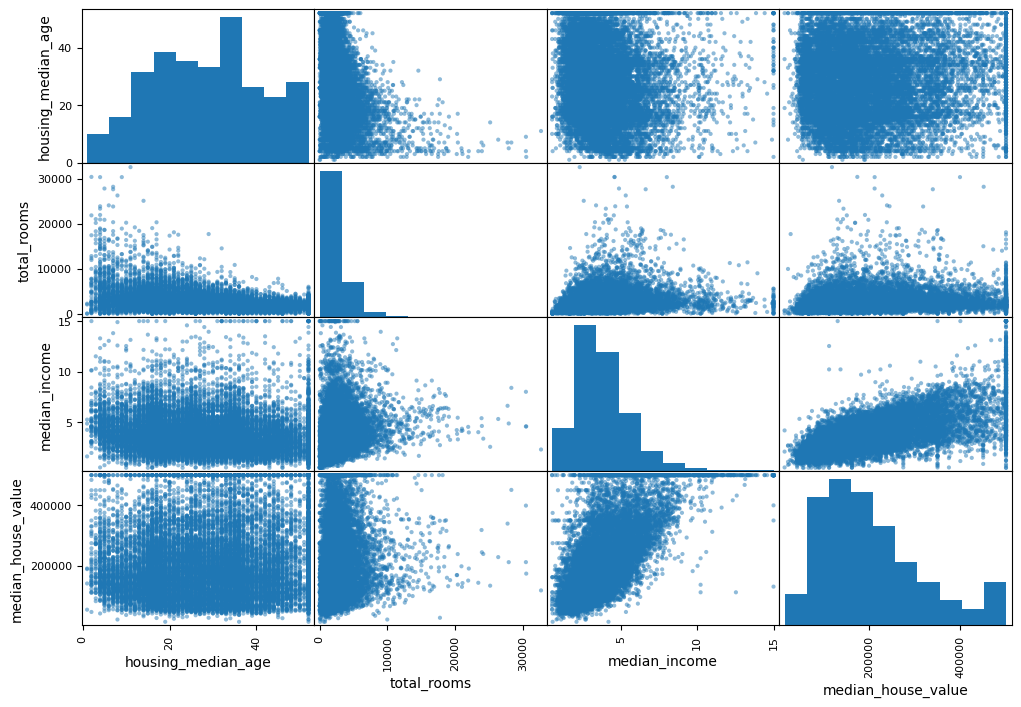

In [14]:
#Plotting the scatter matrix
from pandas.plotting import scatter_matrix

attributes = ["housing_median_age", "total_rooms", "median_income", "median_house_value"]

scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

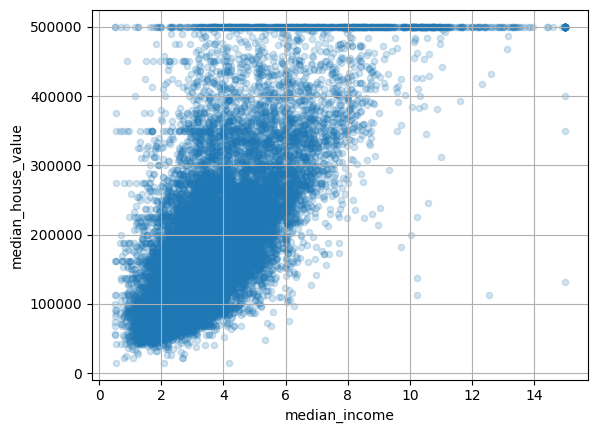

In [15]:
#Since median_income seems to have good amount of affect
housing.plot(kind="scatter" , x="median_income", y="median_house_value", alpha=0.2, grid=True)

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [17]:
#Trying out combination of features
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["households"]
housing["people_per_house"] = housing["population"] /  housing["households"]

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN,5.597948,1.036381,2.475746
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN,5.395210,0.976048,4.179641
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY,4.655660,1.047170,2.004043
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN,6.186154,0.975385,3.350769
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND,10.000000,1.916667,2.625000


In [19]:
corr_matrix = housing.corr()

<ipython-input-19-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [20]:
corr_matrix["median_house_value"].sort_values()

latitude             -0.146324
longitude            -0.043603
bedrooms_ratio       -0.043182
population           -0.025820
people_per_house     -0.021577
total_bedrooms        0.049993
households            0.065798
housing_median_age    0.104714
total_rooms           0.134060
rooms_per_house       0.146940
median_income         0.687013
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [21]:
#Separating the target from the training data
housing  = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [22]:
#Processing the null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#separating the numerical data
import numpy as np
housing_num = housing.select_dtypes(include=[np.number])

#filling the nulls by median
X = imputer.fit_transform(housing_num)

In [23]:
#X here is now a numpy ndarray(no columns or indices), therefore convert to dandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [24]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [25]:
#Handling the categorical attribute

housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7313
INLAND             5276
NEAR OCEAN         2091
NEAR BAY           1827
ISLAND                5
dtype: int64

In [26]:
#Need to use Encoder to convert it into numerical data
#Here since no herarchy, therefore OneHotEncoder should be used

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,0.0,0.0,0.0,0.0,1.0
8267,0.0,0.0,0.0,0.0,1.0
17445,0.0,0.0,0.0,1.0,0.0
14265,1.0,0.0,0.0,0.0,0.0
2271,0.0,1.0,0.0,0.0,0.0


In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [28]:
#We can make a pipeline also

from sklearn.pipeline import make_pipeline
#pipeline for numerical data
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

#to combile both pipeline use column transformer

from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

housing_prepared = preprocessing.fit_transform(housing)

In [29]:
housing_prepared


array([[ 1.17299302, -1.35041487,  0.42853749, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.26802809, -1.37853628, -1.47350948, ...,  0.        ,
         0.        ,  1.        ],
       [-1.3529389 ,  0.98834939, -0.04697426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.11760365,  0.30406165, -0.99799774, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18799856, -0.72705686, -0.522486  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35269038, -0.66144022, -0.522486  , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
#converting the output to pandas dataframe
housing_prepared_new = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing_num.index)
housing_prepared_new.shape

(16512, 13)

In [31]:
#using linear regression and decision tree regression as model and RMSE as performance measure

from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())

from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

from sklearn.metrics import mean_squared_error


In [32]:
#using k-fold cross-validation for decision tree regression

from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     68363.399430
std       1404.275065
min      66637.815189
25%      67580.025452
50%      67866.551569
75%      68641.010461
max      71025.060246
dtype: float64

In [33]:
#computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     68594.058019
std       1708.582052
min      66723.018353
25%      67631.160110
50%      67976.960090
75%      69689.962275
max      71621.455299
dtype: float64

In [34]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [35]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48779.255273
std       1003.837260
min      47054.221523
25%      48101.394627
50%      48655.890987
75%      49678.071994
max      50215.543791
dtype: float64

In [36]:
#here comparing the 3 model's validation errors we are getting best result from random forest (48779)
#Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

18225.232933694657

In [37]:
'''The training error is much lower than the validation error, which usually means that the model has overfit the training set.
 Another possible explanation may be that there's a mismatch between the training data and the validation data,
but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.'''

#fine tuning the model


"The training error is much lower than the validation error, which usually means that the model has overfit the training set.\n Another possible explanation may be that there's a mismatch between the training data and the validation data,\nbut it's not the case here, since both came from the same dataset that we shuffled and split in two parts."

In [38]:
#grid search

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {
     'random_forest__max_features': [4, 6, 8]},
    {
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ocean_proximity'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [39]:
grid_search.best_params_

{'random_forest__max_features': 8}

In [40]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])

In [41]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat',
                                                                               Pipeline(ste...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['ocean_proximity'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7caa29eca9b0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [42]:
#selecting the final model
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)


array([0.11, 0.1 , 0.05, 0.03, 0.02, 0.04, 0.02, 0.45, 0.01, 0.16, 0.  ,
       0.  , 0.01])

In [43]:
#most important features
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.45113087969025367, 'num__median_income'),
 (0.1578132305705504, 'cat__ocean_proximity_INLAND'),
 (0.11100923989937195, 'num__longitude'),
 (0.10266673130991152, 'num__latitude'),
 (0.04764629491574573, 'num__housing_median_age'),
 (0.03537550923143066, 'num__population'),
 (0.028410783365561652, 'num__total_rooms'),
 (0.02445334742132294, 'num__total_bedrooms'),
 (0.022051151622159454, 'num__households'),
 (0.011285969576718834, 'cat__ocean_proximity_<1H OCEAN'),
 (0.0060872584343023865, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0017109718154695512, 'cat__ocean_proximity_NEAR BAY'),
 (0.0003586321472013428, 'cat__ocean_proximity_ISLAND')]

In [44]:
#testing on test set
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

49022.08815054612
